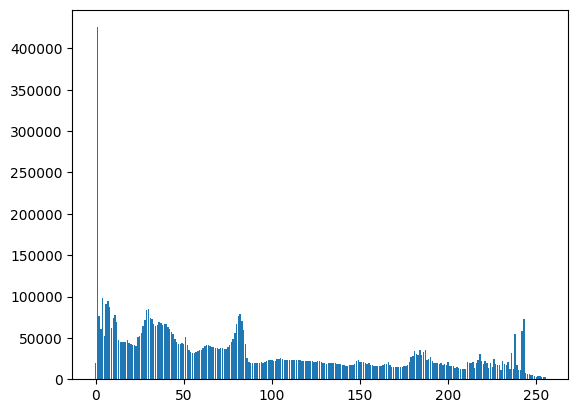

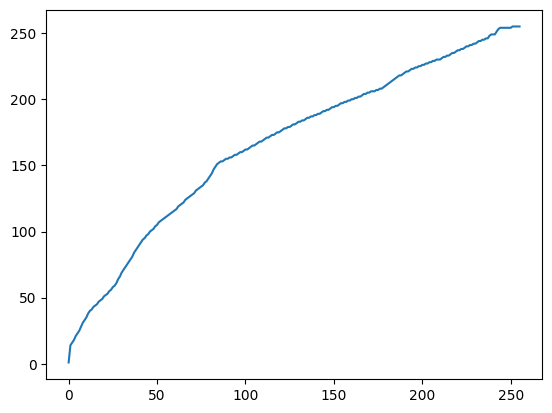

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import collections


# 计算灰度图的直方图
def draw_histogram(grayscale):
    gray_key = []
    gray_count = []
    gray_result = []
    histogram_gray = list(grayscale.ravel())  # 将多维数组转换成一维数组
    gray = dict(collections.Counter(histogram_gray))  # 统计图像中每个灰度级出现的次数
    gray = sorted(gray.items(), key=lambda item: item[0])  # 根据灰度级大小排序
    for element in gray:
        key = list(element)[0]
        count = list(element)[1]
        gray_key.append(key)
        gray_count.append(count)
    for i in range(0, 256):
        if i in gray_key:
            num = gray_key.index(i)
            gray_result.append(gray_count[num])
        else:
            gray_result.append(0)
    gray_result = np.array(gray_result)
    return gray_result


def histogram_equalization(histogram_e, lut_e, image_e):
    sum_temp = 0
    cf = []
    for i in histogram_e:
        sum_temp += i
        cf.append(sum_temp)
    for i, v in enumerate(lut_e):
        lut_e[i] = int(255.0 * (cf[i] / sum_temp) + 0.5)
    equalization_result = lut_e[image_e]
    return equalization_result


x = []
for i in range(0, 256):  # 横坐标
    x.append(i)

image = cv2.imread(r'image\\imgGray.jpg', cv2.COLOR_BGR2GRAY)  # 读取图像
histogram = draw_histogram(image)  # 直方图转化
plt.bar(x, histogram)  # 绘制原图直方图
plt.savefig('image/原图直方图.jpg')
plt.show()

lut = np.zeros(256, dtype=image.dtype)  # 创建空的查找表,返回image类型的用0填充的数组；
result = histogram_equalization(histogram, lut, image)  # 均衡化处理
cv2.imwrite('image\\equalImage.jpg', result)  # 保存均衡化后图片

plt.plot(x, lut)  # 绘制灰度级变换曲线图
plt.savefig('image\\灰度级变换曲线图.jpg')
plt.show()

cv2.imshow('former', image)
cv2.imshow("histogram_equalization", result)
cv2.waitKey(0)
cv2.destroyAllWindows()